### Exercise 1

1. Draw the Bayesian Network representing the joint distribution

$$P(A,B,C,D,E,F,G,H)=P(A)P(B|A)P(C)P(D|B)P(E)P(F|A)P(G|D,F)P(H|E,B).$$

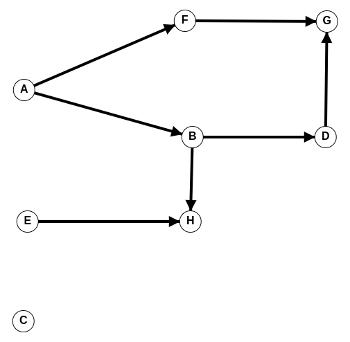

2. Indicate whether the following statements on conditional independence are True or False and motivate your answer.

Let L.M.P. = Local Markov Property that defines a Bayesian Network Graph, i.e.:

*each variable is conditionally independent of its non-descendants given its parent variables.*

Let HT= Head to Tail, TT = Tail Tail and HH = Head Head,

then


 a. $A\perp \!\!\! \perp  B$ :  False: P(A,B) = $\int_{C,D,E,F,G,H} P(A,B,C,D,E,F,G,H)$ = P(B|A) P(A) $\neq$ P(A) P(B)
 
 b. $A \perp \!\!\! \perp  C$ : True: P(A,C) = P(A) P(C)
 
 c. $A\perp \!\!\! \perp  D | \{B, H\}$: True: path from ABD is blocked by B (observed, HT) and path AFGD blocked by unobserved G(HH, no observed descendants)
 
 d. $A\perp \!\!\! \perp  E | F$ : True : Path AFGDBHE blocked by F(observed, HT), furthermore H, unobserved with no observed descendants, is HH for every path 
 
 e. $G\perp \!\!\! \perp  E | B$: True: B, observed, HT for GFABHE, furthermore H, unobserved with no observed descendants, is HH for every path.
 
 f. $F\perp \!\!\! \perp C| D$: True: no path from F to C
 
 g. $E\perp \!\!\! \perp  D | B$: True: H, unobserved with no observed descendants, is HH for every path 
 
 h. $C\perp \!\!\! \perp  H | G$: True: no path from C to H
 

### Exercise 2

Build the generative model corresponding to the directed graph:

Let $\Theta=(\theta_1,..,\theta_k), \, M=(\mu_1,..,\mu_k), Z= (z_{t-1},z_t,z_{t+1}), \, X = (x_{t-1},x_t,x_{t+1})$

\begin{equation*}
P(\Theta,Z,X, M| \alpha, \eta)= \prod_{k=1}^K P(\theta_k|\alpha) P(z_{t-1}| \Theta) P(z_{t}|z_{t-1}, \Theta) P(z_{t+1}|z_t, \Theta) \, \prod_{i\in\{t-1,t,t+1\}} P(x_i|z_i,M) \, \prod_{j=1}^K P(\mu_j|\eta)
\end{equation*}


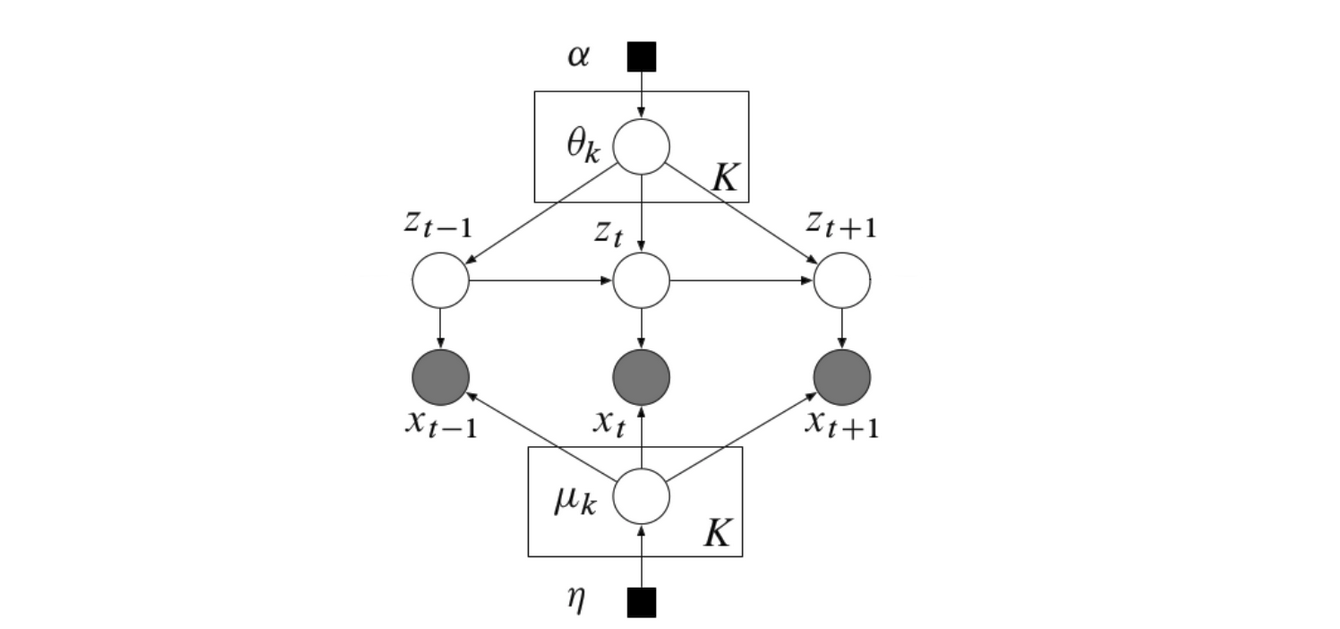

using Dirichlet, Categorical and Normal distributions and supposing that $K=2$. Then, write a `pyro` implementation of the resulting model.

In [4]:
import pyro
import torch
import pyro.distributions as dist

K = 2

alpha = 0.5
eta = 1

def model(K:int, alpha: float, eta: float):
    # Global variables
    with pyro.plate('components', K):
        #Dirichlet
        theta = pyro.sample('theta', dist.Dirichlet(alpha * torch.ones(K)))
        #Normal
        mu = pyro.sample('mu', dist.Normal(0., eta))
    
    z_series = []
    x_series = []
    
    z = pyro.sample('z_0', dist.Categorical(probs=theta))
    x = pyro.sample('x_0', dist.Normal(mu[z], 1))    
    z0 = z
    
    z_series.append(z)
    x_series.append(x)
    
    for j in range(1,3):
        z = pyro.sample('z_' + str(j), dist.Categorical(probs=theta[z0]))
        x = pyro.sample('x_' + str(j), dist.Normal(mu[z], 1))
        z0 = z
        
        z_series.append(z)
        x_series.append(x)
    print(z_series)
    print(x_series)
        
model(K, alpha, eta)

[tensor([1, 0]), tensor([0, 1]), tensor([1, 0])]
[tensor([-1.1610,  1.0784]), tensor([ 0.8941, -0.0410]), tensor([-0.3467, -0.7407])]
